In [1]:
!pip install category_encoders

You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
#Import all the things

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
from sklearn.metrics import accuracy_score

# Create the Data Frames

In [2]:
X_df = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/train_features.csv')
pd.set_option('display.max_columns', 100)
X_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
y_df = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/train_labels.csv')
y_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
X_test_df= pd.read_csv('/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/test_features.csv')
X_test_df.head()

# Hold on to this one for later

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [7]:
X_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [8]:
X_df.isna().sum() #going to move forward with the NaN's for our baseline

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

# Find our baseline

In [9]:
y_df['status_group'].value_counts(normalize=True) #majority baseline is .543

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [10]:
y = y_df.drop(columns='id')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
        X_df, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44550, 40), (14850, 40), (44550, 1), (14850, 1))

In [13]:
majority_class = y_train.mode()
y_pred = np.full(shape=y_test.shape, fill_value=majority_class)

In [14]:
accuracy_score(y_test, y_pred) ##Baseline = majority class using all columns

0.5453198653198653

# Create first model

In [15]:
X = X_df.select_dtypes('number')
X = X.drop(columns='id')
X = scale(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44550, 9), (14850, 9), (44550, 1), (14850, 1))

In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
accuracy_score(y_train,y_pred)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.55672278338945

In [18]:
X_test_sc = X_test_df.drop(columns='id')
X_test_sc = X_test_sc.select_dtypes('number')
X_test_sc = scale(X_test_sc)
#Testing with Test data
X_test_sc

array([[-0.12798429,  1.9504066 ,  0.18408659, ..., -0.2770127 ,
         0.28136694,  0.74932705],
       [-0.12798429,  1.32999082,  0.39217066, ..., -0.37911642,
         0.23725387,  0.73672887],
       [-0.12798429,  1.32708489,  0.10442199, ..., -0.37911642,
         0.65737833,  0.74722736],
       ...,
       [-0.12798429,  1.19486514,  0.1001475 , ..., -0.37911642,
         0.02719163,  0.74722736],
       [-0.12798429,  0.50034818,  0.20570873, ..., -0.37911642,
        -0.07783948,  0.74617751],
       [-0.12798429, -0.25083439,  0.10399411, ..., -0.2770127 ,
        -0.30890794,  0.74512766]])

In [19]:
y_pred = logreg.predict(X_test_sc)

y_pred_df = pd.DataFrame(y_pred)

ids = pd.DataFrame(X_test_df['id'])

pass1 = ids.join(y_pred_df)

pass1.rename(columns={0:'status_group'}, 
                 inplace=True)

pass1.set_index('id')

pass1.to_csv(path_or_buf='/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/pass1',index=False)


In [20]:
pass1.head() #Pass 1 gets a .55105, slightly better than our baseline

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


# Coefficients

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


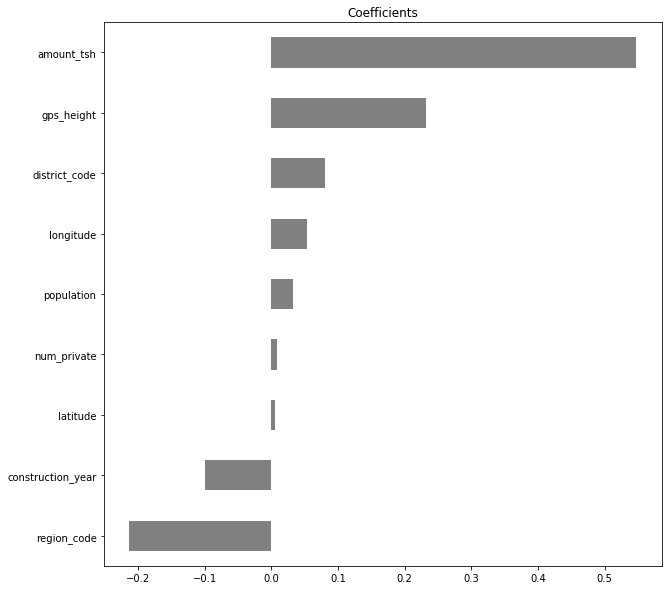

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title('Coefficients')
new_X = X_df.drop(columns='id')

coefficients = logreg.fit(X_train, y_train).coef_[0]
feature_names = new_X.select_dtypes('number').columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color='gray');

In [34]:
X_df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [5]:
X_df = X_df.drop(columns='scheme_name') #Too many NaN's to be useful
X_test_df = X_test_df.drop(columns='scheme_name') #Too many NaN's to be useful

In [6]:
X_df['water_quality'] = X_df['water_quality'].replace('unknown', 'unknown_water_quality')
oh_wq = pd.get_dummies(X_df['water_quality'])
X_df = X_df.drop(columns ='water_quality')
X_df = X_df.join(oh_wq)

In [7]:
X_test_df['water_quality'] = X_test_df['water_quality'].replace('unknown', 'unknown_water_quality')
t_oh_wq = pd.get_dummies(X_test_df['water_quality'])
X_test_df = X_test_df.drop(columns ='water_quality')
X_test_df = X_test_df.join(t_oh_wq)

X_test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,coloured,fluoride,fluoride abandoned,milky,salty,salty abandoned,soft,unknown_water_quality
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,0,0,0,0,0,0,1,0
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,0,0,0,0,0,0,1,0
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,0,0,0,0,0,0,1,0
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,True,1987,other,other,other,vwc,user-group,unknown,unknown,good,dry,dry,shallow well,shallow well,groundwater,other,other,0,0,0,0,0,0,1,0
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0,0,0,0,0,0,1,0


In [8]:
X_df['quantity'] = X_df['quantity'].replace('unknown', 'unknown_quantity')
oh_wq = pd.get_dummies(X_df['quantity'])
X_df = X_df.drop(columns ='quantity')
X_df = X_df.join(oh_wq)

X_test_df['quantity'] = X_test_df['quantity'].replace('unknown', 'unknown_quantity')
t_oh_wq = pd.get_dummies(X_test_df['quantity'])
X_test_df = X_test_df.drop(columns ='quantity')
X_test_df = X_test_df.join(t_oh_wq)

In [9]:
X_df['waterpoint_type_group'] = X_df['waterpoint_type_group'].replace('other', 'other_waterpoint_type_group')
oh_wq = pd.get_dummies(X_df['waterpoint_type_group'])
X_df = X_df.drop(columns ='waterpoint_type_group')
X_df = X_df.join(oh_wq)

X_test_df['waterpoint_type_group'] = X_test_df['waterpoint_type_group'].replace('other', 'other_waterpoint_type_group')
t_oh_wq = pd.get_dummies(X_test_df['waterpoint_type_group'])
X_test_df = X_test_df.drop(columns ='waterpoint_type_group')
X_test_df = X_test_df.join(t_oh_wq)

In [10]:
X_df['source_type'] = X_df['source_type'].replace('unknown', 'unknown_source_type')
X_df['source_type'] = X_df['source_type'].replace('dam', 'dam_source_type')
oh_st = pd.get_dummies(X_df['source_type'])
X_df = X_df.drop(columns ='source_type')
X_df = X_df.join(oh_st)

X_test_df['source_type'] = X_test_df['source_type'].replace('unknown', 'unknown_source_type')
X_test_df['source_type'] = X_test_df['source_type'].replace('dam', 'dam_source_type')
t_oh_wq = pd.get_dummies(X_test_df['source_type'])
X_test_df = X_test_df.drop(columns ='source_type')
X_test_df = X_test_df.join(t_oh_wq)

In [55]:
#PASS 2 with some one hot encoding columns

X = X_df.select_dtypes('number')
X = X.drop(columns='id')
X = scale(X)

X_test_sc = X_test_df.drop(columns='id')
X_test_sc = X_test_sc.select_dtypes('number')
X_test_sc = scale(X_test_sc)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_test_sc.shape

((44550, 35), (14850, 35), (44550, 1), (14850, 1), (14358, 35))

In [57]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
accuracy_score(y_train,y_pred)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7001122334455668

In [58]:
y_pred = logreg.predict(X_test_sc)

y_pred_df = pd.DataFrame(y_pred)

ids = pd.DataFrame(X_test_df['id'])

pass2 = ids.join(y_pred_df)

pass2.rename(columns={0:'status_group'}, 
                 inplace=True)

pass2.set_index('id')

pass2.to_csv(path_or_buf='/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/pass2.csv',index=False)

## Pass 2 gets a .702

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


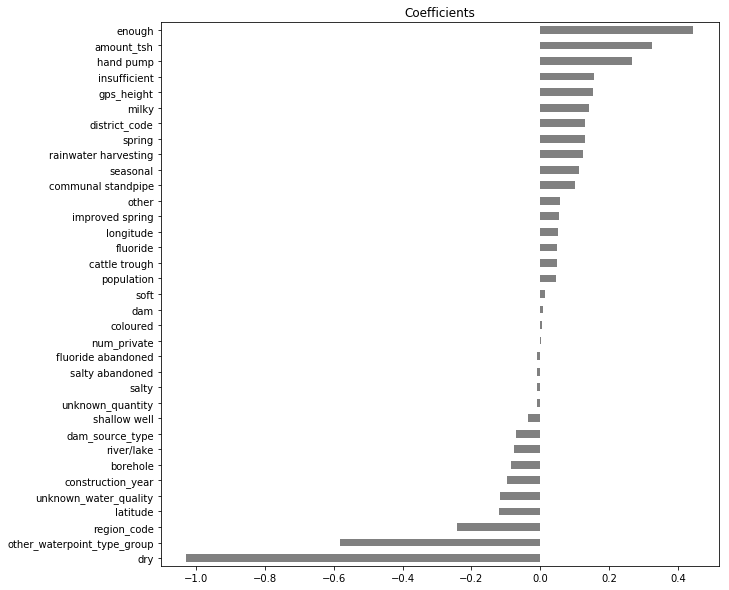

In [59]:
plt.figure(figsize=(10,10))
plt.title('Coefficients')
new_X = X_df.drop(columns='id')

coefficients = logreg.fit(X_train, y_train).coef_[0]
feature_names = new_X.select_dtypes('number').columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color='gray');

In [11]:
#Using more techniques for adding OHE features

#X_df['funder'].value_counts().nlargest(30)

X_df.loc[~X_df['funder'].isin(['Government Of Tanzania','Danida','Hesawa','Rwssp',
                      'World Bank','Kkkt','World Vision','Unicef','Tasaf',
                      'District Council','Dhv','Private Individual','Dwsp',
                      0,'Norad','Germany Republi','Tcrs','Ministry Of Water',
                      'Water']), 'funder'] = 'other_funder'

X_test_df.loc[~X_test_df['funder'].isin(['Government Of Tanzania','Danida','Hesawa','Rwssp',
                      'World Bank','Kkkt','World Vision','Unicef','Tasaf',
                      'District Council','Dhv','Private Individual','Dwsp',
                      0,'Norad','Germany Republi','Tcrs','Ministry Of Water',
                      'Water']), 'funder'] = 'other_funder'

#X_df['funder'].value_counts()
X_test_df['funder'].value_counts()

other_funder              7512
Government Of Tanzania    2117
Danida                     774
Hesawa                     573
World Bank                 335
Kkkt                       330
Rwssp                      319
World Vision               306
Unicef                     267
Tasaf                      250
Dhv                        236
Private Individual         205
Dwsp                       193
District Council           192
Norad                      184
Germany Republi            155
Water                      152
Ministry Of Water          130
Tcrs                       128
Name: funder, dtype: int64

In [12]:
oh_f = pd.get_dummies(X_df['funder'])
X_df = X_df.drop(columns ='funder')
X_df = X_df.join(oh_f)

t_oh_f = pd.get_dummies(X_test_df['funder'])
X_test_df = X_test_df.drop(columns ='funder')
X_test_df = X_test_df.join(t_oh_f)

In [13]:
#X_df.wpt_name.value_counts().nlargest(20)

X_df.loc[~X_df['wpt_name'].isin(['none','Shuleni','Zahanati','Msikitini','Kanisani'
                               ,'Bombani','Sokoni','Ofisini','School','Shule Ya Msingi'
                               ,'Shule','Sekondari','Muungano','Mkombozi','Madukani'
                               ,'Hospital','Mbugani','Upendo','Kituo Cha Afya','Mkuyuni'])
                                 , 'wpt_name'] = 'other_wpt_name'

X_test_df.loc[~X_test_df['wpt_name'].isin(['none','Shuleni','Zahanati','Msikitini','Kanisani'
                               ,'Bombani','Sokoni','Ofisini','School','Shule Ya Msingi'
                               ,'Shule','Sekondari','Muungano','Mkombozi','Madukani'
                               ,'Hospital','Mbugani','Upendo','Kituo Cha Afya','Mkuyuni'])
                                 , 'wpt_name'] = 'other_wpt_name'

oh_wptn = pd.get_dummies(X_df['wpt_name'])
X_df = X_df.drop(columns ='wpt_name')
X_df = X_df.join(oh_wptn)

t_oh_wptn = pd.get_dummies(X_test_df['wpt_name'])
X_test_df = X_test_df.drop(columns ='wpt_name')
X_test_df = X_test_df.join(t_oh_wptn)

In [194]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14358 entries, 0 to 14357
Data columns (total 99 columns):
id                             14358 non-null int64
amount_tsh                     14358 non-null float64
date_recorded                  14358 non-null object
gps_height                     14358 non-null int64
installer                      13570 non-null object
longitude                      14358 non-null float64
latitude                       14358 non-null float64
num_private                    14358 non-null int64
basin                          14358 non-null object
subvillage                     14264 non-null object
region                         14358 non-null object
region_code                    14358 non-null int64
district_code                  14358 non-null int64
lga                            14358 non-null object
ward                           14358 non-null object
population                     14358 non-null int64
public_meeting                 13573 non-null 

In [226]:
#PASS 3 with more one hot encoding columns

X = X_df.select_dtypes('number')
X = X.drop(columns='id')
X = scale(X)

X_test_sc = X_test_df.drop(columns='id')
X_test_sc = X_test_sc.select_dtypes('number')
X_test_sc = scale(X_test_sc)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_test_sc.shape

((44550, 75), (14850, 75), (44550, 1), (14850, 1), (14358, 75))

In [156]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
accuracy_score(y_train,y_pred)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7079685746352413

In [157]:
y_pred = logreg.predict(X_test_sc)

y_pred_df = pd.DataFrame(y_pred)

ids = pd.DataFrame(X_test_df['id'])

pass3 = ids.join(y_pred_df)

pass3.rename(columns={0:'status_group'}, 
                 inplace=True)

pass3.set_index('id')

pass3.to_csv(path_or_buf='/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/pass3.csv',index=False)

## Pass 3 gets a .71

In [14]:
#Date is not in date format

X_df['date_recorded'] = pd.to_datetime(X_df['date_recorded'])
X_test_df['date_recorded'] = pd.to_datetime(X_test_df['date_recorded'])

X_df['YearMonth'] = X_df['date_recorded'].map(lambda x: 100*x.year + x.month)
X_test_df['YearMonth'] = X_test_df['date_recorded'].map(lambda x: 100*x.year + x.month)

X_df['Year'] = X_df['date_recorded'].map(lambda x: x.year)
X_test_df['Year'] = X_test_df['date_recorded'].map(lambda x: x.year)

X_df['Month'] = X_df['date_recorded'].map(lambda x: x.month)
X_test_df['Month'] = X_test_df['date_recorded'].map(lambda x: x.month)

In [15]:
#MORE OHE!! YAY!
#X_df['basin'].value_counts()
oh_b = pd.get_dummies(X_df['basin'])
X_df = X_df.drop(columns ='basin')
X_df = X_df.join(oh_b)

t_oh_b = pd.get_dummies(X_test_df['basin'])
X_test_df = X_test_df.drop(columns ='basin')
X_test_df = X_test_df.join(t_oh_b)

In [16]:
#X_df['public_meeting'].value_counts().nlargest(25)

oh_pm = pd.get_dummies(X_df['public_meeting'])
X_df = X_df.drop(columns ='public_meeting')
X_df = X_df.join(oh_pm)

t_oh_pm = pd.get_dummies(X_test_df['public_meeting'])
X_test_df = X_test_df.drop(columns ='public_meeting')
X_test_df = X_test_df.join(t_oh_pm)

In [17]:
#X_df['scheme_management'].value_counts().nlargest(25)

oh_sm = pd.get_dummies(X_df['scheme_management'])
X_df = X_df.drop(columns ='scheme_management')
X_df = X_df.join(oh_sm)

t_oh_sm = pd.get_dummies(X_test_df['scheme_management'])
X_test_df = X_test_df.drop(columns ='scheme_management')
X_test_df = X_test_df.join(t_oh_sm)

In [18]:
#X_df['permit'].value_counts().nlargest(25)

X_df['permit'] = X_df['permit'].map({True: 1, False: 0, np.nan: -1})
X_test_df['permit'] = X_test_df['permit'].map({True: 1, False: 0, np.nan: -1})
X_test_df['None'] = 0

#X_df.describe(include='all')

In [288]:
X_test_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,permit,construction_year,coloured,fluoride,fluoride abandoned,milky,salty,salty abandoned,soft,unknown_water_quality,dry,enough,insufficient,seasonal,unknown_quantity,cattle trough,communal standpipe,dam,hand pump,improved spring,other_waterpoint_type_group,borehole,dam_source_type,other,rainwater harvesting,river/lake,shallow well,spring,Danida,Dhv,District Council,Dwsp,Germany Republi,Government Of Tanzania,Hesawa,Kkkt,Ministry Of Water,Norad,Private Individual,Rwssp,Tasaf,Tcrs,Unicef,Water,World Bank,World Vision,other_funder,Bombani,Hospital,Kanisani,Kituo Cha Afya,Madukani,Mbugani,Mkombozi,Mkuyuni,Msikitini,Muungano,Ofisini,School,Sekondari,Shule,Shule Ya Msingi,Shuleni,Sokoni,Upendo,Zahanati,none,other_wpt_name,Internal,Lake Nyasa,Lake Rukwa,Lake Tanganyika,Lake Victoria,Pangani,Rufiji,Ruvuma / Southern Coast,Wami / Ruvu,False,True,Company,Other,Parastatal,Private operator,SWC,Trust,VWC,WUA,WUG,Water Board,Water authority
count,14358.000000,14358.000000,14358.0000,14358.000000,1.435800e+04,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000
mean,37232.859799,324.219996,653.6363,34.082414,-5.697584e+00,0.408971,15.156359,5.713052,187.055439,0.611436,1298.251985,0.009124,0.002995,0.000139,0.013094,0.084691,0.005572,0.852277,0.032108,0.105725,0.556972,0.256233,0.068394,0.012676,0.002298,0.575289,0.000070,0.300251,0.012119,0.109974,0.204903,0.012049,0.004457,0.035869,0.172656,0.293286,0.276779,0.053907,0.016437,0.013372,0.013442,0.010795,0.147444,0.039908,0.022984,0.009054,0.012815,0.014278,0.022218,0.017412,0.008915,0.018596,0.010586,0.023332,0.021312,0.523193,0.003552,0.000418,0.004527,0.001463,0.001672,0.001323,0.002298,0.000975,0.007731,0.001532,0.004666,0.003482,0.001880,0.002089,0.003204,0.028834,0.004666,0.002507,0.013372,0.057250,0.852556,0.118331,0.081209,0.041789,0.110879,0.176557,0.149951,0.137066,0.075707,0.108511,0.088104,0.857222,0.019432,0.015949,0.027998,0.017760,0.001811,0.001393,0.613386,0.045550,0.087408,0.047639,0.056275
std,21382.890432,2533.367778,688.2721,6.564449,2.947444e+00,8.231859,17.387588,9.794304,476.065978,0.574419,952.551852,0.095085,0.054645,0.011802,0.113680,0.278432,0.074439,0.354837,0.176292,0.307496,0.496761,0.436567,0.252429,0.111875,0.047888,0.494316,0.008346,0.458383,0.109420,0.312868,0.403645,0.109109,0.066617,0.185969,0.377963,0.455284,0.447422,0.225842,0.127153,0.114867,0.115162,0.103342,0.354560,0.195750,0.149857,0.094725,0.112480,0.118638,0.147396,0.130805,0.094000,0.135098,0.102348,0.150961,0.144428,0.499479,0.059495,0.020439,0.067134,0.038217,0.040852,0.036354,0.047888,0.031212,0.087588,0.039115,0.068154,0.058911,0.043325,0.045664,0.056513,0.167346,0.068154,0.050012,0.114867,0.232328,0.354560,0.323011,0.273165,0.200113,0.313993,0.381306,0

In [289]:
X_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,permit,construction_year,coloured,fluoride,fluoride abandoned,milky,salty,salty abandoned,soft,unknown_water_quality,dry,enough,insufficient,seasonal,unknown_quantity,cattle trough,communal standpipe,dam,hand pump,improved spring,other_waterpoint_type_group,borehole,dam_source_type,other,rainwater harvesting,river/lake,shallow well,spring,Danida,Dhv,District Council,Dwsp,Germany Republi,Government Of Tanzania,Hesawa,Kkkt,Ministry Of Water,Norad,Private Individual,Rwssp,Tasaf,Tcrs,Unicef,Water,World Bank,World Vision,other_funder,Bombani,Hospital,Kanisani,Kituo Cha Afya,Madukani,Mbugani,Mkombozi,Mkuyuni,Msikitini,Muungano,Ofisini,School,Sekondari,Shule,Shule Ya Msingi,Shuleni,Sokoni,Upendo,Zahanati,none,other_wpt_name,Internal,Lake Nyasa,Lake Rukwa,Lake Tanganyika,Lake Victoria,Pangani,Rufiji,Ruvuma / Southern Coast,Wami / Ruvu,False,True,Company,None,Other,Parastatal,Private operator,SWC,Trust,VWC,WUA,WUG,Water Board,Water authority
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.00000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,0.602626,1300.652475,0.008249,0.003367,0.000286,0.013535,0.081751,0.005707,0.855522,0.031582,0.105152,0.558687,0.254697,0.068182,0.013283,0.001953,0.582912,0.000118,0.294411,0.013199,0.107407,0.201162,0.011044,0.004680,0.038636,0.174697,0.283232,0.286549,0.052424,0.013956,0.014192,0.013653,0.010269,0.152929,0.037071,0.021667,0.009933,0.012879,0.013906,0.023131,0.014764,0.010135,0.017795,0.009815,0.02271,0.020976,0.527795,0.004562,0.001582,0.005438,0.001515,0.001751,0.001582,0.001869,0.001481,0.009007,0.002239,0.004276,0.003502,0.002458,0.002559,0.003350,0.029428,0.004377,0.001566,0.013973,0.059983,0.843502,0.131061,0.085606,0.041313,0.108283,0.172525,0.150505,0.134276,0.075640,0.100791,0.085101,0.858771,0.017862,0.000017,0.012896,0.028283,0.017896,0.001633,0.001212,0.619411,0.048535,0.087643,0.046263,0.053081
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,0.585123,951.620547,0.090450,0.057929,0.016915,0.115552,0.273987,0.075330,0.351577,0.174887,0.306751,0.496548,0.435694,0.252060,0.114484,0.044148,0.493082,0.010855,0.455781,0.114126,0.309633,0.400872,0.104508,0.068252,0.192728,0.379711,0.450572,0.452153,0.222883,0.117310,0.118282,0.116047,0.100817,0.359922,0.188937,0.145594,0.099167,0.112753,0.117101,0.150322,0.120609,0.100161,0.132205,0.098583,0.14898,0.143307,0.499231,0.067391,0.039749,0.073541,0.038896,0.041807,0.039749,0.043188,0.038462,0.094476,0.047266,0.065252,0.059072,0.049517,0.050521,0.057784,0.169003,0.066015,0.039538,0.117380,0.237458,0.363330,0.337469,0.2797

In [383]:
#PASS 4 with more one hot encoding columns 

X = X_df.select_dtypes('number')
X = X.drop(columns='id')
X = scale(X)

X_test_sc = X_test_df.select_dtypes('number')
X_test_sc = X_test_sc.drop(columns='id')
X_test_sc = scale(X_test_sc)

In [384]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_test_sc.shape

((44550, 102), (14850, 102), (44550, 1), (14850, 1), (14358, 102))

In [385]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
accuracy_score(y_train,y_pred)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7156902356902357

In [386]:
y_pred = logreg.predict(X_test_sc)

y_pred_df = pd.DataFrame(y_pred)

ids = pd.DataFrame(X_test_df['id'])

pass4 = ids.join(y_pred_df)

pass4.rename(columns={0:'status_group'}, 
                 inplace=True)

pass4.set_index('id')

pass4.to_csv(path_or_buf='/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/pass4.csv',index=False)


In [393]:
# plt.figure(figsize=(10,10))
# plt.title('Coefficients')
pd.set_option('display.max_rows', 115)
new_X = X_df.drop(columns='id')

coefficients = logreg.fit(X_train, y_train).coef_[0]
feature_names = new_X.select_dtypes('number').columns
pd.Series(coefficients, feature_names).sort_values()
#.plot.barh(color='gray');

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


dry                           -1.094152
other_waterpoint_type_group   -0.562099
latitude                      -0.189194
Government Of Tanzania        -0.178335
construction_year             -0.160928
Lake Rukwa                    -0.159353
False                         -0.151936
region_code                   -0.125756
Company                       -0.120803
unknown_water_quality         -0.111207
VWC                           -0.102397
Ruvuma / Southern Coast       -0.099674
shallow well                  -0.096668
Tcrs                          -0.085110
Ministry Of Water             -0.082669
Water authority               -0.078839
Lake Tanganyika               -0.071185
borehole                      -0.068039
World Bank                    -0.054240
river/lake                    -0.050505
Norad                         -0.049396
Dwsp                          -0.047095
Shuleni                       -0.045587
District Council              -0.045291
dam_source_type               -0.045186


In [415]:
X_df = X_df.drop(columns=['Sokoni','unknown_quantity','Mkuyuni','Dhv','Msikitini','SWC','Zahanati'])
X_test_df = X_test_df.drop(columns=['Sokoni','unknown_quantity','Mkuyuni','Dhv','Msikitini','SWC','Zahanati'])

In [411]:
X_df = X_df.drop(columns=['Muungano'])
X_test_df = X_test_df.drop(columns=['Muungano'])

In [406]:
X_df = X_df.drop(columns=['Upendo','num_private','Shule','Tasaf','Trust','salty'])
X_test_df = X_test_df.drop(columns=['Upendo','num_private','Shule','Tasaf','Trust','salty'])

KeyError: "['Upendo' 'num_private'] not found in axis"

In [407]:
X_df = X_df.drop(columns=['Shule','Tasaf','Trust','salty'])
X_test_df = X_test_df.drop(columns=['Shule','Tasaf','Trust','salty'])

In [416]:
#PASS 5 with dropping lowest coef features

X = X_df.select_dtypes('number')
X = X.drop(columns='id')
X = scale(X)

X_test_sc = X_test_df.select_dtypes('number')
X_test_sc = X_test_sc.drop(columns='id')
X_test_sc = scale(X_test_sc)

In [417]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_test_sc.shape

((44550, 88), (14850, 88), (44550, 1), (14850, 1), (14358, 88))

In [418]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
accuracy_score(y_train,y_pred)

#Not great, let's check out L1 & L2 for feature selection

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7155780022446689

In [423]:
lgl2 = LogisticRegression(C=0.01, penalty="l2",dual=False)
lgl2.fit(X_train,y_train)
y_pred = lgl2.predict(X_train)
accuracy_score(y_train,y_pred)

#slightly better, but not enough

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.716026936026936

In [46]:
X = X_df.select_dtypes('number')
X = X.drop(columns=['id','gps_height','district_code'])
X = scale(X)

y = y_df.drop(columns='id')
y = y.replace({'functional':0, 'non functional':2,'functional needs repair':1 })
                    
X_test_sc = X_test_df.select_dtypes('number')
X_test_sc = X_test_sc.drop(columns=['id','gps_height','district_code'])
X_test_sc = scale(X_test_sc) 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
y_pred = knn.predict(X_train)
print(mean_squared_error(y_train,y_pred))
print(mean_squared_error(y_test,knn.predict(X_test)))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


0.5491806958473625
0.7625589225589225


In [35]:
y_pred = knn.predict(X_test_sc)

y_pred_df = pd.DataFrame(y_pred)

ids = pd.DataFrame(X_test_df['id'])

pass5 = ids.join(y_pred_df)

pass5.rename(columns={0:'status_group'}, 
                 inplace=True)

pass5.set_index('id')

pass5['status_group'] = pass5['status_group'].replace({0:'functional', 2:'non functional',1:'functional needs repair'})

In [36]:
pass5.to_csv(path_or_buf='/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/pass6.csv',index=False)

In [37]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_train)
print(mean_squared_error(y_train,y_pred))
print(mean_squared_error(y_test,ridge.predict(X_test)))

0.6251865725320637
0.6233518262861912


In [38]:
from sklearn.ensemble import RandomForestClassifier as RFC

# Fitting a Random Forest Classifier
rfc_b = RFC()

rfc_b.fit(X_train,y_train)
y_pred = rfc_b.predict(X_train)
print(mean_squared_error(y_train,y_pred))
print(mean_squared_error(y_test,rfc_b.predict(X_test)))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.056722783389450054
0.6230976430976432


In [41]:
y_pred = rfc_b.predict(X_test_sc)

y_pred_df = pd.DataFrame(y_pred)

ids = pd.DataFrame(X_test_df['id'])

pass7 = ids.join(y_pred_df)

pass7.rename(columns={0:'status_group'}, 
                 inplace=True)

pass7.set_index('id')

pass7['status_group'] = pass7['status_group'].replace({0:'functional', 2:'non functional',1:'functional needs repair'})

In [42]:
pass7.to_csv(path_or_buf='/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/pass7.csv',index=False)

#Best so far at .755

# Creating pipeline with SelectKbest

In [55]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

pipe = make_pipeline( 
    SelectKBest(mutual_info_classif), 
    RFC()
)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'selectkbest__k': [10,25,50,75,100], 
    'randomforestclassifier__class_weight': [None,'balanced'],
}

gs = GridSearchCV(pipe,param_grid=param_grid, cv=5,
                 scoring='mean_squared_error')

gs.fit(X_train,y_train)

pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be rem

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__class_weight,param_selectkbest__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,29.110103,0.387246,0.025296,0.001221,None,50,"{'randomforestclassifier__class_weight': None,...",-0.624439,-0.634680,-0.645230,-0.624200,-0.654170,-0.636543,0.011734,1,-0.063836,-0.057211,-0.055527,-0.060773,-0.061025,-0.059675,0.002954
9,29.908360,0.521917,0.038256,0.001262,balanced,100,{'randomforestclassifier__class_weight': 'bala...,-0.639026,-0.631313,-0.649046,-0.624986,-0.638792,-0.636633,0.008104,2,-0.053061,-0.058726,-0.056341,-0.058668,-0.059650,-0.057289,0.002380
7,29.427793,0.445826,0.026324,0.000834,balanced,50,{'randomforestclassifier__class_weight': 'bala...,-0.631845,-0.641863,-0.636139,-0.623976,-0.662027,-0.639169,0.012832,3,-0.061760,-0.057267,-0.059905,-0.059819,-0.058304,-0.059411,0.001533
3,29.221343,0.284568,0.031416,0.000862,None,75,"{'randomforestclassifier__class_weight': None,...",-0.643402,-0.631313,-0.627946,-0.642609,-0.659221,-0.640898,0.010996,4,-0.055559,-0.060241,-0.057379,-0.058472,-0.056760,-0.057682,0.001589
8,29.794565,0.173927,0.033750,0.001184,balanced,75,{'randomforestclassifier__class_weight': 'bala...,-0.643290,-0.627609,-0.649832,-0.618588,-0.670109,-0.641886,0.017934,5,-0.060076,-0.058081,-0.058446,-0.058921,-0.056480,-0.058401,0.001172
1,28.917613,0.372017,0.020828,0.000477,None,25,"{'randomforestclassifier__class_weight': None,...",-0.650022,-0.632997,-0.641639,-0.643170,-0.648445,-0.643255,0.006010,6,-0.064790,-0.059792,-0.064310,-0.061642,-0.063354,-0.062778,0.001840
4,29.579638,0.466270,0.035960,0.000862,None,100,"{'randomforestclassifier__class_weight': None,...",-0.632181,-0.652525,-0.652301,-0.620945,-0.671568,-0.645903,0.017633,7,-0.056232,-0.055948,-0.056453,-0.054796,-0.058135,-0.056313,0.001075
6,29.296281,0.450363,0.021669,0.000535,balanced,25,{'randomforestclassifier__class_weight': 'bala...,-0.652154,-0.647475,-0.665769,-0.650803,-0.651701,-0.653580,0.006311,8,-0.066306,-0.062851,-0.063721,-0.063943,-0.064532,-0.064271,0.001152
5,29.512720,0.182769,0.019191,0.000499,balanced,10,{'randomforestclassifier__class_weight': 'bala...,-0.676952,-0.675758,-0.715376,-0.673140,-0.698619,-0.687969,0.016462,9,-0.069897,-0.075617,-0.078030,-0.074465,-0.066777,-0.072957,0.004066
0,29.103949,0.475406,0.019992,0.000985,None,10,"{'randomforestclassifier__class_weight': None,...",-0.695467,-0.695174,-0.702469,-0.676844,-0.702772,-0.694545,0.009434,10,-0.071805,-0.074046,-0.070258,-0.070845,-0.072332,-0.071857,0.001312


In [56]:
print('Best score:',gs.best_score_)
print('Parameters for best score:', gs.best_params_)

Best score: -0.6365432098765432
Parameters for best score: {'randomforestclassifier__class_weight': None, 'selectkbest__k': 50}


In [57]:
test_score = gs.score(X_test, y_test)
print('Test Score:', test_score)

Test Score: -0.6259259259259259


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [60]:
# Which features were selected?
X_names = X_df.select_dtypes('number')
X_names = X_names.drop(columns=['id','gps_height','district_code'])

selector = gs.best_estimator_.named_steps['selectkbest']
all_names = X_names.columns
selected_mask = selector.get_support()
selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask]

print('Features selected:')
for name in selected_names:
    print(name)

print()
print('Features not selected:')
for name in unselected_names:
    print(name)

Features selected:
amount_tsh
longitude
latitude
region_code
population
permit
construction_year
soft
unknown_water_quality
dry
enough
seasonal
unknown_quantity
cattle trough
communal standpipe
hand pump
other_waterpoint_type_group
borehole
other
rainwater harvesting
river/lake
shallow well
spring
Dwsp
Germany Republi
Government Of Tanzania
Kkkt
Ministry Of Water
other_funder
Madukani
Mkuyuni
Shule
Shuleni
Upendo
none
YearMonth
Year
Month
Lake Nyasa
Lake Tanganyika
Pangani
Rufiji
Ruvuma / Southern Coast
False
True
SWC
Trust
VWC
WUG
Water Board

Features not selected:
num_private
coloured
fluoride
fluoride abandoned
milky
salty
salty abandoned
insufficient
dam
improved spring
dam_source_type
Danida
Dhv
District Council
Hesawa
Norad
Private Individual
Rwssp
Tasaf
Tcrs
Unicef
Water
World Bank
World Vision
Bombani
Hospital
Kanisani
Kituo Cha Afya
Mbugani
Mkombozi
Msikitini
Muungano
Ofisini
School
Sekondari
Shule Ya Msingi
Sokoni
Zahanati
other_wpt_name
Internal
Lake Rukwa
Lake Victoria
Wam

In [67]:
#Dropping lowest coefficients

X = X_df.select_dtypes('number')
X = X.drop(columns=['id','num_private','coloured','fluoride','fluoride abandoned',
                    'milky','salty','salty abandoned','insufficient','dam',
                    'improved spring','dam_source_type','Danida','Dhv',
                    'District Council','Hesawa','Norad','Private Individual',
                    'Rwssp','Tasaf','Tcrs','Unicef','Water','World Bank',
                    'World Vision','Bombani','Hospital','Kanisani','Kituo Cha Afya',
                    'Mbugani','Mkombozi','Msikitini','Muungano','Ofisini','School',
                    'Sekondari','Shule Ya Msingi','Sokoni','Zahanati','other_wpt_name',
                    'Internal','Lake Rukwa','Lake Victoria','Wami / Ruvu','Company',
                    'None','Other','Parastatal','Private operator','WUA','Water authority'])
X = scale(X)

X_test_sc = X_test_df.select_dtypes('number')
X_test_sc = X_test_sc.drop(columns=['id','num_private','coloured','fluoride','fluoride abandoned',
                    'milky','salty','salty abandoned','insufficient','dam',
                    'improved spring','dam_source_type','Danida','Dhv',
                    'District Council','Hesawa','Norad','Private Individual',
                    'Rwssp','Tasaf','Tcrs','Unicef','Water','World Bank',
                    'World Vision','Bombani','Hospital','Kanisani','Kituo Cha Afya',
                    'Mbugani','Mkombozi','Msikitini','Muungano','Ofisini','School',
                    'Sekondari','Shule Ya Msingi','Sokoni','Zahanati','other_wpt_name',
                    'Internal','Lake Rukwa','Lake Victoria','Wami / Ruvu','Company',
                    'None','Other','Parastatal','Private operator','WUA','Water authority'])
X_test_sc = scale(X_test_sc)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

In [69]:
rfc_b.fit(X_train,y_train)
y_pred = rfc_b.predict(X_train)
print(accuracy_score(y_train,y_pred))
print(accuracy_score(y_test,rfc_b.predict(X_test)))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.9794388327721661
0.793063973063973


In [70]:
y_pred = rfc_b.predict(X_test_sc)

y_pred_df = pd.DataFrame(y_pred)

ids = pd.DataFrame(X_test_df['id'])

pass8 = ids.join(y_pred_df)

pass8.rename(columns={0:'status_group'}, 
                 inplace=True)

pass8.set_index('id')

pass8['status_group'] = pass8['status_group'].replace({0:'functional', 2:'non functional',1:'functional needs repair'})

In [71]:
pass8.to_csv(path_or_buf='/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/pass8.csv',index=False)